
<center><h1>Course Review Project</h1></center>
<center><h3> Maggie Han </h3> </center>

## Import requried library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score # continuous is not supported
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.ensemble import StackingClassifier

from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import category_scatter
import seaborn as sns
from ydata_profiling import ProfileReport

C:\ProgramData\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\Hanme\AppData\Roaming\Python\Python311\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


## 1. Concat data from CareerKarma, Switchup, coursecompare

In [2]:
# import CareerKarma data
CareerKarma = pd.read_csv(r"C:\Users\Hanme\Desktop\WeCloudData\Protfoilo Project\Course Review Project\CareerKarma.csv", index_col=0)
CareerKarma.head()

,school,overview,review title,review star,Instructors,Curriculum,Job Assistance,Overall Experience,Comments,pros,cons
0,WeCloudData,4.8/5,Full Time DS Bootcamp Review,5,4,5,3,5,Overall a great program especially for career ...,- Knowledgeable and patient instructors and TA...,- Learning experience felt more individual rat...
1,WeCloudData,4.8/5,A good bootcamp! its worth to make the decision,5,5,5,5,5,I attended the data and business analytics boo...,"Great support, nice tutor, practical content",Time were a bit tight to learn everything
2,WeCloudData,4.8/5,Best DS BootCamp in Canada,5,5,5,5,5,I arrived in Canada with a Bachelor's degree i...,Really straight forward wth projects that help...,Pretty Intense so it will be better if you are...
3,WeCloudData,4.8/5,Best DS in Canada,5,5,5,5,5,I arrived in Canada with a Bachelor's degree i...,"Really straight forward, with projects that he...","Intense, So It will be better if you don't hav..."
4,WeCloudData,4.8/5,Great program with helpful career guidance,5,5,4,5,5,I attended WeCloudData Applied BI program in 2...,Instructors/mentors/TAs are nice. My mentor Le...,A bit intensive or not that friendly for full ...


In [3]:
len(CareerKarma)

2771

In [4]:
# create column website
CareerKarma['Website'] = 'CareerKarma'

In [5]:
# create column course
CareerKarma['Course'] = 'NaN'

In [6]:
# rename columns
CareerKarma.rename(columns={'review star': 'Overall_rating'}, inplace=True)
CareerKarma.rename(columns={'review title': 'Title'}, inplace=True)
CareerKarma.rename(columns={'Comments': 'Review'}, inplace=True)

In [7]:
# reindex columns, change the order of columns
CareerKarma = CareerKarma.reindex(columns = ['school', 'overview', 'Course', 'Title', 'Review', 'Overall_rating', 'Instructors',
       'Curriculum', 'Job Assistance', 'Overall Experience', 'pros',
       'cons', 'Website'])

In [8]:
# convert data range from 0-5 to 0-100
CareerKarma['Overall_rating'] = CareerKarma['Overall_rating'] * 20

CareerKarma['Instructors'] = CareerKarma['Instructors'] * 20

CareerKarma['Curriculum'] = CareerKarma['Curriculum'] * 20

CareerKarma['Job Assistance'] = CareerKarma['Job Assistance'] * 20

CareerKarma['Overall Experience'] = CareerKarma['Overall Experience'] * 20

In [9]:
CareerKarma.head()

,school,overview,Course,Title,Review,Overall_rating,Instructors,Curriculum,Job Assistance,Overall Experience,pros,cons,Website
0,WeCloudData,4.8/5,NaN,Full Time DS Bootcamp Review,Overall a great program especially for career ...,100,80,100,60,100,- Knowledgeable and patient instructors and TA...,- Learning experience felt more individual rat...,CareerKarma
1,WeCloudData,4.8/5,NaN,A good bootcamp! its worth to make the decision,I attended the data and business analytics boo...,100,100,100,100,100,"Great support, nice tutor, practical content",Time were a bit tight to learn everything,CareerKarma
2,WeCloudData,4.8/5,NaN,Best DS BootCamp in Canada,I arrived in Canada with a Bachelor's degree i...,100,100,100,100,100,Really straight forward wth projects that help...,Pretty Intense so it will be better if you are...,CareerKarma
3,WeCloudData,4.8/5,NaN,Best DS in Canada,I arrived in Canada with a Bachelor's degree i...,100,100,100,100,100,"Really straight forward, with projects that he...","Intense, So It will be better if you don't hav...",CareerKarma
4,WeCloudData,4.8/5,NaN,Great program with helpful career guidance,I attended WeCloudData Applied BI program in 2...,100,100,80,100,100,Instructors/mentors/TAs are nice. My mentor Le...,A bit intensive or not that friendly for full ...,CareerKarma


In [10]:
# import Switchup_cc data
Switchup_cc = pd.read_csv(r"C:\Users\Hanme\Desktop\WeCloudData\Protfoilo Project\Course Review Project\Switchup_Coursecompare.csv", encoding= 'unicode_escape', index_col=0)
Switchup_cc.head()

,Reviewer,Course,Date,Overall_rating,Curriculum_rating,Job_Support_rating,Instructors_rating,Title,Review,Location,Job,Year_graduated,Bootcamp,Website
0,Sami Sidhik,Applied Business Intelligence Certificate,2022-05-24,100.0,100.0,100.0,100.0,Great way to enter into the world of Data Anal...,I had a great experience with the Business Int...,Vancouver,NaN,NaN,WeCloudData,CourseCompare
1,Kevin,Data Science Bootcamp,2022-05-01,80.0,100.0,80.0,100.0,A boost for your smooth career switch,I became familiar with WCD in early January 20...,Montreal,NaN,NaN,WeCloudData,CourseCompare
2,Anonymous,Applied Business Intelligence Certificate,2022-04-29,100.0,NaN,NaN,100.0,Part time data analytics course,It was an amazing experience highly recommend ...,Toronto,NaN,NaN,WeCloudData,CourseCompare
3,Manika Midha,Data Science Bootcamp,2022-04-13,100.0,100.0,60.0,80.0,Great Experience,I had a great experience. I liked the instruct...,Toronto,NaN,NaN,WeCloudData,CourseCompare
4,Harold Castillo,Applied Business Intelligence Certificate,2022-04-07,100.0,100.0,100.0,100.0,Great Experience,I had the pleasure to share this experience wi...,Toronto,NaN,NaN,WeCloudData,CourseCompare


In [11]:
len(Switchup_cc)

6682

In [12]:
# drop reviewer, date, location, job, year_graduated
Switchup_cc = Switchup_cc.drop(columns = ['Reviewer', 'Date', 'Location', 'Job', 'Year_graduated'])

In [13]:
# create pros, cons, overview, overall experience
Switchup_cc['pros'] = 'NaN'
Switchup_cc['cons'] = 'NaN'
Switchup_cc['overview'] = 'NaN'
Switchup_cc['Overall Experience'] = 'NaN'

In [14]:
# rename columns
Switchup_cc.rename(columns={'Bootcamp': 'school'}, inplace=True)
Switchup_cc.rename(columns={'Curriculum_rating': 'Curriculum'}, inplace=True)
Switchup_cc.rename(columns={'Job_Support_rating': 'Job Assistance'}, inplace=True)
Switchup_cc.rename(columns={'Instructors_rating': 'Instructors'}, inplace=True)

In [15]:
# reindex columns, switch order
Switchup_cc = Switchup_cc.reindex(columns = ['school', 'overview', 'Course', 'Title', 'Review', 'Overall_rating', 'Instructors',
       'Curriculum', 'Job Assistance', 'Overall Experience', 'pros',
       'cons', 'Website'])

In [16]:
Switchup_cc.head()

,school,overview,Course,Title,Review,Overall_rating,Instructors,Curriculum,Job Assistance,Overall Experience,pros,cons,Website
0,WeCloudData,NaN,Applied Business Intelligence Certificate,Great way to enter into the world of Data Anal...,I had a great experience with the Business Int...,100.0,100.0,100.0,100.0,NaN,NaN,NaN,CourseCompare
1,WeCloudData,NaN,Data Science Bootcamp,A boost for your smooth career switch,I became familiar with WCD in early January 20...,80.0,100.0,100.0,80.0,NaN,NaN,NaN,CourseCompare
2,WeCloudData,NaN,Applied Business Intelligence Certificate,Part time data analytics course,It was an amazing experience highly recommend ...,100.0,100.0,NaN,NaN,NaN,NaN,NaN,CourseCompare
3,WeCloudData,NaN,Data Science Bootcamp,Great Experience,I had a great experience. I liked the instruct...,100.0,80.0,100.0,60.0,NaN,NaN,NaN,CourseCompare
4,WeCloudData,NaN,Applied Business Intelligence Certificate,Great Experience,I had the pleasure to share this experience wi...,100.0,100.0,100.0,100.0,NaN,NaN,NaN,CourseCompare


In [17]:
# contact two tables as data
data = pd.concat([CareerKarma,Switchup_cc])

In [18]:
len(data)

9453

In [19]:
# save data to csv
data.to_csv('data.csv', index=False)

## 2. EDA analysis

In [20]:
# read data
data = pd.read_csv('data.csv', index_col=0)

In [21]:
# remove'/5' from overview
data['overview'] = data['overview'].str.replace('/5','')

In [22]:
data.head()

,overview,Course,Title,Review,Overall_rating,Instructors,Curriculum,Job Assistance,Overall Experience,pros,cons,Website
school,,,,,,,,,,,,
WeCloudData,4.8,NaN,Full Time DS Bootcamp Review,Overall a great program especially for career ...,100.0,80.0,100.0,60.0,100.0,- Knowledgeable and patient instructors and TA...,- Learning experience felt more individual rat...,CareerKarma
WeCloudData,4.8,NaN,A good bootcamp! its worth to make the decision,I attended the data and business analytics boo...,100.0,100.0,100.0,100.0,100.0,"Great support, nice tutor, practical content",Time were a bit tight to learn everything,CareerKarma
WeCloudData,4.8,NaN,Best DS BootCamp in Canada,I arrived in Canada with a Bachelor's degree i...,100.0,100.0,100.0,100.0,100.0,Really straight forward wth projects that help...,Pretty Intense so it will be better if you are...,CareerKarma
WeCloudData,4.8,NaN,Best DS in Canada,I arrived in Canada with a Bachelor's degree i...,100.0,100.0,100.0,100.0,100.0,"Really straight forward, with projects that he...","Intense, So It will be better if you don't hav...",CareerKarma
WeCloudData,4.8,NaN,Great program with helpful career guidance,I attended WeCloudData Applied BI program in 2...,100.0,100.0,80.0,100.0,100.0,Instructors/mentors/TAs are nice. My mentor Le...,A bit intensive or not that friendly for full ...,CareerKarma


In [23]:
len(data)

9453

In [24]:
# check datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9453 entries, WeCloudData to Le Wagon
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   overview            2771 non-null   object 
 1   Course              5433 non-null   object 
 2   Title               9449 non-null   object 
 3   Review              9453 non-null   object 
 4   Overall_rating      9453 non-null   float64
 5   Instructors         3281 non-null   float64
 6   Curriculum          9450 non-null   float64
 7   Job Assistance      9267 non-null   float64
 8   Overall Experience  2771 non-null   float64
 9   pros                2771 non-null   object 
 10  cons                2771 non-null   object 
 11  Website             9453 non-null   object 
dtypes: float64(5), object(7)
memory usage: 960.1+ KB


In [25]:
# check null values
data.isnull().sum()

overview              6682
Course                4020
Title                    4
Review                   0
Overall_rating           0
Instructors           6172
Curriculum               3
Job Assistance         186
Overall Experience    6682
pros                  6682
cons                  6682
Website                  0
dtype: int64

In [26]:
# dropna of curriculum (3 lines)
data.dropna(subset=['Curriculum'], inplace=True)

In [27]:
# dropna of title (4 lines)
data.dropna(subset=['Title'], inplace=True)

In [28]:
# drop course(a lot null), overall experience (similar to overview)
data.drop(['Overall Experience'], axis=1, inplace=True)

In [29]:
# assign average of instructors and curriculum to null in job assistance
data = data.reset_index()
data.loc[data['Job Assistance'].isnull(), 'Job Assistance'] = (data['Instructors'] + data['Curriculum']) / 2

In [30]:
# assign average of job assistance and curriculum to null in instructors
data.loc[data['Instructors'].isnull(), 'Instructors'] = (data['Job Assistance'] + data['Curriculum']) / 2

In [31]:
# organize school name
data['school'] = data['school'].replace('Brainstation', 'BrainStation')
data['school'] = data['school'].replace('LighthouseLabs', 'Lighthouse Labs')
data['school'] = data['school'].replace('JunoCollege', 'Juno College')

In [32]:
data.isnull().sum()

school               0
overview          6675
Course            4016
Title                0
Review               0
Overall_rating       0
Instructors          0
Curriculum           0
Job Assistance       0
pros              6675
cons              6675
Website              0
dtype: int64

In [33]:
data.head()

,school,overview,Course,Title,Review,Overall_rating,Instructors,Curriculum,Job Assistance,pros,cons,Website
0,WeCloudData,4.8,NaN,Full Time DS Bootcamp Review,Overall a great program especially for career ...,100.0,80.0,100.0,60.0,- Knowledgeable and patient instructors and TA...,- Learning experience felt more individual rat...,CareerKarma
1,WeCloudData,4.8,NaN,A good bootcamp! its worth to make the decision,I attended the data and business analytics boo...,100.0,100.0,100.0,100.0,"Great support, nice tutor, practical content",Time were a bit tight to learn everything,CareerKarma
2,WeCloudData,4.8,NaN,Best DS BootCamp in Canada,I arrived in Canada with a Bachelor's degree i...,100.0,100.0,100.0,100.0,Really straight forward wth projects that help...,Pretty Intense so it will be better if you are...,CareerKarma
3,WeCloudData,4.8,NaN,Best DS in Canada,I arrived in Canada with a Bachelor's degree i...,100.0,100.0,100.0,100.0,"Really straight forward, with projects that he...","Intense, So It will be better if you don't hav...",CareerKarma
4,WeCloudData,4.8,NaN,Great program with helpful career guidance,I attended WeCloudData Applied BI program in 2...,100.0,100.0,80.0,100.0,Instructors/mentors/TAs are nice. My mentor Le...,A bit intensive or not that friendly for full ...,CareerKarma


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9446 entries, 0 to 9445
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   school          9446 non-null   object 
 1   overview        2771 non-null   object 
 2   Course          5430 non-null   object 
 3   Title           9446 non-null   object 
 4   Review          9446 non-null   object 
 5   Overall_rating  9446 non-null   float64
 6   Instructors     9446 non-null   float64
 7   Curriculum      9446 non-null   float64
 8   Job Assistance  9446 non-null   float64
 9   pros            2771 non-null   object 
 10  cons            2771 non-null   object 
 11  Website         9446 non-null   object 
dtypes: float64(4), object(8)
memory usage: 885.7+ KB


In [35]:
# check Course's unique value
data['Course'].nunique()

180

### 2.1 NLP analysis

In [50]:
# make a copy of data as data_ml
data_ml = data
data_ml.head()

,school,overview,Course,Title,Review,Overall_rating,Instructors,Curriculum,Job Assistance,pros,cons,Website,Review_clean
0,WeCloudData,4.8,NaN,Full Time DS Bootcamp Review,Overall a great program especially for career ...,100.0,80.0,100.0,60.0,- Knowledgeable and patient instructors and TA...,- Learning experience felt more individual rat...,CareerKarma,"[v, e, r, l, l, , , g, r, e, , p, r, g, r, ..."
1,WeCloudData,4.8,NaN,A good bootcamp! its worth to make the decision,I attended the data and business analytics boo...,100.0,100.0,100.0,100.0,"Great support, nice tutor, practical content",Time were a bit tight to learn everything,CareerKarma,"[ , e, n, e, , h, e, , , n, , b, u, n, e, ..."
2,WeCloudData,4.8,NaN,Best DS BootCamp in Canada,I arrived in Canada with a Bachelor's degree i...,100.0,100.0,100.0,100.0,Really straight forward wth projects that help...,Pretty Intense so it will be better if you are...,CareerKarma,"[ , r, r, v, e, , n, , c, n, , w, h, , , ..."
3,WeCloudData,4.8,NaN,Best DS in Canada,I arrived in Canada with a Bachelor's degree i...,100.0,100.0,100.0,100.0,"Really straight forward, with projects that he...","Intense, So It will be better if you don't hav...",CareerKarma,"[ , r, r, v, e, , n, , c, n, , w, h, , , ..."
4,WeCloudData,4.8,NaN,Great program with helpful career guidance,I attended WeCloudData Applied BI program in 2...,100.0,100.0,80.0,100.0,Instructors/mentors/TAs are nice. My mentor Le...,A bit intensive or not that friendly for full ...,CareerKarma,"[ , e, n, e, , w, e, c, l, u, , p, p, l, e, ..."


In [51]:
data_ml.head()

,school,overview,Course,Title,Review,Overall_rating,Instructors,Curriculum,Job Assistance,pros,cons,Website,Review_clean
0,WeCloudData,4.8,NaN,Full Time DS Bootcamp Review,Overall a great program especially for career ...,100.0,80.0,100.0,60.0,- Knowledgeable and patient instructors and TA...,- Learning experience felt more individual rat...,CareerKarma,"[v, e, r, l, l, , , g, r, e, , p, r, g, r, ..."
1,WeCloudData,4.8,NaN,A good bootcamp! its worth to make the decision,I attended the data and business analytics boo...,100.0,100.0,100.0,100.0,"Great support, nice tutor, practical content",Time were a bit tight to learn everything,CareerKarma,"[ , e, n, e, , h, e, , , n, , b, u, n, e, ..."
2,WeCloudData,4.8,NaN,Best DS BootCamp in Canada,I arrived in Canada with a Bachelor's degree i...,100.0,100.0,100.0,100.0,Really straight forward wth projects that help...,Pretty Intense so it will be better if you are...,CareerKarma,"[ , r, r, v, e, , n, , c, n, , w, h, , , ..."
3,WeCloudData,4.8,NaN,Best DS in Canada,I arrived in Canada with a Bachelor's degree i...,100.0,100.0,100.0,100.0,"Really straight forward, with projects that he...","Intense, So It will be better if you don't hav...",CareerKarma,"[ , r, r, v, e, , n, , c, n, , w, h, , , ..."
4,WeCloudData,4.8,NaN,Great program with helpful career guidance,I attended WeCloudData Applied BI program in 2...,100.0,100.0,80.0,100.0,Instructors/mentors/TAs are nice. My mentor Le...,A bit intensive or not that friendly for full ...,CareerKarma,"[ , e, n, e, , w, e, c, l, u, , p, p, l, e, ..."


In [52]:
# fix contractions

import re
def cleaner(review):
    review = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", " ", review) 
    
    review = re.sub(r"won\'t", "will not", review) 
    review = re.sub(r"can\'t", "can not", review)
    review = re.sub(r"n\'t", " not", review)
    review = re.sub(r"\'re", " are", review)
    review = re.sub(r"\'s", " is", review)
    review = re.sub(r"\'d", " would", review)
    review = re.sub(r"\'ll", " will", review)
    review = re.sub(r"\'t", " not", review)
    review = re.sub(r"\'ve", " have", review)
    review = re.sub(r"\'m", " am", review)
    
    review = re.sub(r"[^a-zA-z]", " ", review) 
    review = re.sub("(^|\W)\d+($|\W)", " ", review)  
    review = re.sub('\W+',' ',review)
    review = re.sub(r"\s+", " ", review) 
    review = review.lower()  
    review = review.strip() 
    
    return review

data_ml['Review_clean'] = data_ml['Review'].apply(cleaner)
data_ml['Review_clean']

0       overall a great program especially for career ...
1       i attended the data and business analytics boo...
2       i arrived in canada with a bachelor is degree ...
3       i arrived in canada with a bachelor is degree ...
4       i attended weclouddata applied bi program in j...
                              ...                        
9441    put simply i knew nothing about development mo...
9442    the training exceeded my expectations master i...
9443    i attended the week bootcamp by le wagon in ea...
9444    i entered le wagon program after being graduat...
9445    i strongly recommend this bootcamp the team is...
Name: Review_clean, Length: 9446, dtype: object

In [53]:
# tokenization
from nltk.tokenize import word_tokenize
data_ml['Review_clean'] = data_ml['Review_clean'].apply(word_tokenize) 
data_ml['Review_clean']

0       [overall, a, great, program, especially, for, ...
1       [i, attended, the, data, and, business, analyt...
2       [i, arrived, in, canada, with, a, bachelor, is...
3       [i, arrived, in, canada, with, a, bachelor, is...
4       [i, attended, weclouddata, applied, bi, progra...
                              ...                        
9441    [put, simply, i, knew, nothing, about, develop...
9442    [the, training, exceeded, my, expectations, ma...
9443    [i, attended, the, week, bootcamp, by, le, wag...
9444    [i, entered, le, wagon, program, after, being,...
9445    [i, strongly, recommend, this, bootcamp, the, ...
Name: Review_clean, Length: 9446, dtype: object

In [54]:
# split review and remove stopwords
from nltk.corpus import stopwords
stoplist = stopwords.words('english')+['brainstation','brain','station','bs','retreat','datascienceretreat','dsr','general','assembly','generalassembly',\
              'ga','juno','college','junocollege','jc','le','wagon','lewagon','lw','lighthouselabs','lighthouse', 'labs','light','house','lhl','metis',\
              'nyc','nycdatascience','practicum','springboard','spring','board','sb','toronto','school','management',\
              'torontoschoolofmanagement','tsofm','incubator','thedataincubator','tdi','thinkful','weclouddata','wecloud','wcd','bootcamp','boot','camp','bootcamps']
data_ml['Review_clean'] = data_ml['Review_clean'].apply(lambda x: [word for word in x if word not in stoplist])
data_ml['Review_clean']

0       [overall, great, program, especially, career, ...
1       [attended, data, business, analytics, early, g...
2       [arrived, canada, bachelor, degree, industrial...
3       [arrived, canada, bachelor, degree, industrial...
4       [attended, applied, bi, program, jan, finished...
                              ...                        
9441    [put, simply, knew, nothing, development, mont...
9442    [training, exceeded, expectations, master, wee...
9443    [attended, week, early, technical, background,...
9444    [entered, program, graduated, one, top, french...
9445    [strongly, recommend, team, really, really, go...
Name: Review_clean, Length: 9446, dtype: object

In [55]:
# stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
data_ml['Review_clean'] = data_ml['Review_clean'].apply(lambda x : [stemmer.stem(y) for y in x])
data_ml['Review_clean']

0       [overal, great, program, especi, career, switc...
1       [attend, data, busi, analyt, earli, got, dream...
2       [arriv, canada, bachelor, degre, industri, eng...
3       [arriv, canada, bachelor, degre, industri, eng...
4       [attend, appli, bi, program, jan, finish, earl...
                              ...                        
9441    [put, simpli, knew, noth, develop, month, ago,...
9442    [train, exceed, expect, master, week, basi, de...
9443    [attend, week, earli, technic, background, wha...
9444    [enter, program, graduat, one, top, french, bu...
9445    [strong, recommend, team, realli, realli, good...
Name: Review_clean, Length: 9446, dtype: object

In [56]:
# lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data_ml['Review_clean'] = data_ml['Review_clean'].apply(lambda lst:[lemmatizer.lemmatize(word) for word in lst])
data_ml['Review_clean']

0       [overal, great, program, especi, career, switc...
1       [attend, data, busi, analyt, earli, got, dream...
2       [arriv, canada, bachelor, degre, industri, eng...
3       [arriv, canada, bachelor, degre, industri, eng...
4       [attend, appli, bi, program, jan, finish, earl...
                              ...                        
9441    [put, simpli, knew, noth, develop, month, ago,...
9442    [train, exceed, expect, master, week, basi, de...
9443    [attend, week, earli, technic, background, wha...
9444    [enter, program, graduat, one, top, french, bu...
9445    [strong, recommend, team, realli, realli, good...
Name: Review_clean, Length: 9446, dtype: object

In [57]:
data_ml.head()

,school,overview,Course,Title,Review,Overall_rating,Instructors,Curriculum,Job Assistance,pros,cons,Website,Review_clean
0,WeCloudData,4.8,NaN,Full Time DS Bootcamp Review,Overall a great program especially for career ...,100.0,80.0,100.0,60.0,- Knowledgeable and patient instructors and TA...,- Learning experience felt more individual rat...,CareerKarma,"[overal, great, program, especi, career, switc..."
1,WeCloudData,4.8,NaN,A good bootcamp! its worth to make the decision,I attended the data and business analytics boo...,100.0,100.0,100.0,100.0,"Great support, nice tutor, practical content",Time were a bit tight to learn everything,CareerKarma,"[attend, data, busi, analyt, earli, got, dream..."
2,WeCloudData,4.8,NaN,Best DS BootCamp in Canada,I arrived in Canada with a Bachelor's degree i...,100.0,100.0,100.0,100.0,Really straight forward wth projects that help...,Pretty Intense so it will be better if you are...,CareerKarma,"[arriv, canada, bachelor, degre, industri, eng..."
3,WeCloudData,4.8,NaN,Best DS in Canada,I arrived in Canada with a Bachelor's degree i...,100.0,100.0,100.0,100.0,"Really straight forward, with projects that he...","Intense, So It will be better if you don't hav...",CareerKarma,"[arriv, canada, bachelor, degre, industri, eng..."
4,WeCloudData,4.8,NaN,Great program with helpful career guidance,I attended WeCloudData Applied BI program in 2...,100.0,100.0,80.0,100.0,Instructors/mentors/TAs are nice. My mentor Le...,A bit intensive or not that friendly for full ...,CareerKarma,"[attend, appli, bi, program, jan, finish, earl..."


In [58]:
data_ml.to_csv('data_ml.csv', index=False)

## EDA analysis

In [59]:
data_ml = pd.read_csv('data_ml.csv')

In [60]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9446 entries, 0 to 9445
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   school          9446 non-null   object 
 1   overview        2771 non-null   float64
 2   Course          5430 non-null   object 
 3   Title           9446 non-null   object 
 4   Review          9446 non-null   object 
 5   Overall_rating  9446 non-null   float64
 6   Instructors     9446 non-null   float64
 7   Curriculum      9446 non-null   float64
 8   Job Assistance  9446 non-null   float64
 9   pros            2771 non-null   object 
 10  cons            2771 non-null   object 
 11  Website         9446 non-null   object 
 12  Review_clean    9446 non-null   object 
dtypes: float64(5), object(8)
memory usage: 959.5+ KB


In [61]:
data_ml['overview'] = data_ml['overview'].astype('float64')

In [62]:
data_ml['overview'].mean() * 20

94.43233489714905

In [63]:
data_ml['Overall_rating'].mean()

93.64556426000424

In [64]:
data_ml = data_ml.drop('overview',axis=1)

In [65]:
data_ml.head()

,school,Course,Title,Review,Overall_rating,Instructors,Curriculum,Job Assistance,pros,cons,Website,Review_clean
0,WeCloudData,NaN,Full Time DS Bootcamp Review,Overall a great program especially for career ...,100.0,80.0,100.0,60.0,- Knowledgeable and patient instructors and TA...,- Learning experience felt more individual rat...,CareerKarma,"['overal', 'great', 'program', 'especi', 'care..."
1,WeCloudData,NaN,A good bootcamp! its worth to make the decision,I attended the data and business analytics boo...,100.0,100.0,100.0,100.0,"Great support, nice tutor, practical content",Time were a bit tight to learn everything,CareerKarma,"['attend', 'data', 'busi', 'analyt', 'earli', ..."
2,WeCloudData,NaN,Best DS BootCamp in Canada,I arrived in Canada with a Bachelor's degree i...,100.0,100.0,100.0,100.0,Really straight forward wth projects that help...,Pretty Intense so it will be better if you are...,CareerKarma,"['arriv', 'canada', 'bachelor', 'degre', 'indu..."
3,WeCloudData,NaN,Best DS in Canada,I arrived in Canada with a Bachelor's degree i...,100.0,100.0,100.0,100.0,"Really straight forward, with projects that he...","Intense, So It will be better if you don't hav...",CareerKarma,"['arriv', 'canada', 'bachelor', 'degre', 'indu..."
4,WeCloudData,NaN,Great program with helpful career guidance,I attended WeCloudData Applied BI program in 2...,100.0,100.0,80.0,100.0,Instructors/mentors/TAs are nice. My mentor Le...,A bit intensive or not that friendly for full ...,CareerKarma,"['attend', 'appli', 'bi', 'program', 'jan', 'f..."


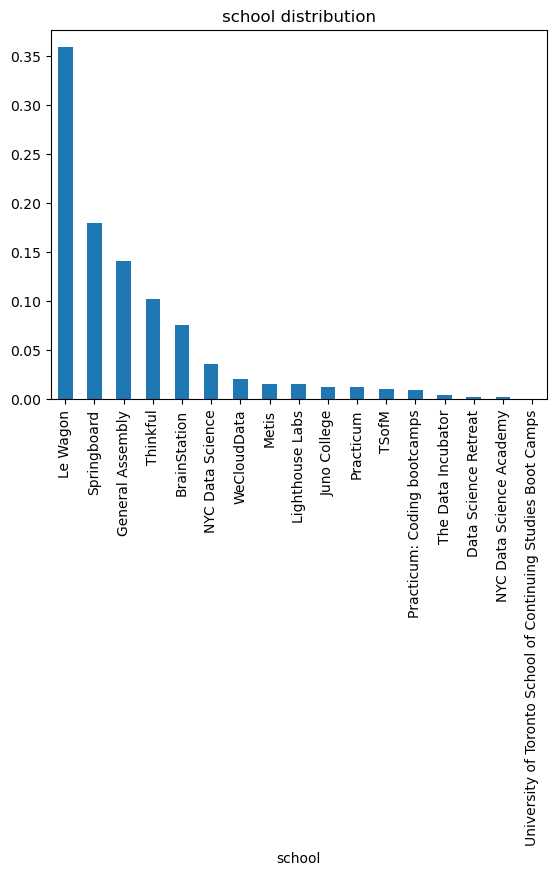

In [66]:
data_ml['school'].value_counts(normalize=True).plot(kind='bar')
plt.title('school distribution');

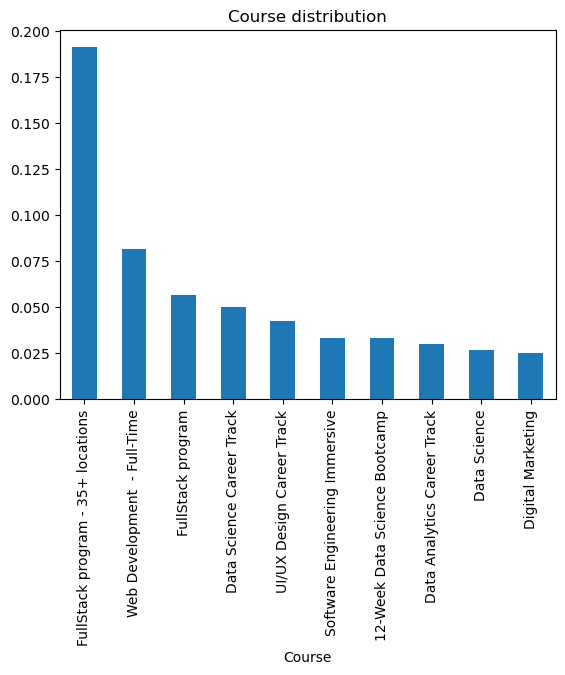

In [67]:
data_ml['Course'].value_counts(normalize=True).nlargest(10).plot(kind='bar')
plt.title('Course distribution');

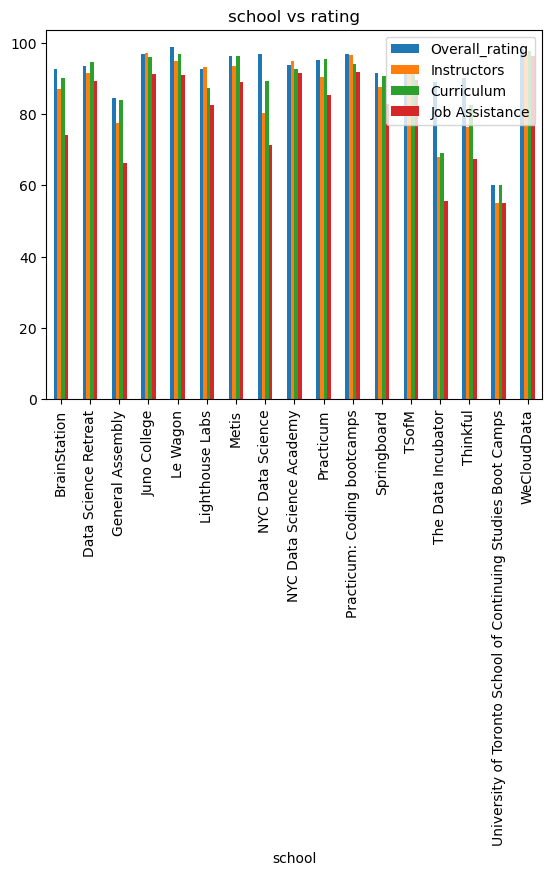

In [68]:
# school vs overall_rating
data_ml.groupby(data_ml['school'])[['Overall_rating', 'Instructors','Curriculum', 'Job Assistance']].mean().plot(kind = 'bar')
plt.title('school vs rating');

## Model development

1. use data from Coursecompare and Switchup as train and test data, predict course title in CareerKarma
2. use data from CareerKarma as train and test data, predict pros and cons for Coursecompare and Switchup

### Model for Course/Program

In [69]:
data_ml.columns.tolist()

['school',
 'Course',
 'Title',
 'Review',
 'Overall_rating',
 'Instructors',
 'Curriculum',
 'Job Assistance',
 'pros',
 'cons',
 'Website',
 'Review_clean']

In [70]:
data_course = data_ml[['Title', 'Review', 'Course']].copy()

In [71]:
data_course.head()

,Title,Review,Course
0,Full Time DS Bootcamp Review,Overall a great program especially for career ...,NaN
1,A good bootcamp! its worth to make the decision,I attended the data and business analytics boo...,NaN
2,Best DS BootCamp in Canada,I arrived in Canada with a Bachelor's degree i...,NaN
3,Best DS in Canada,I arrived in Canada with a Bachelor's degree i...,NaN
4,Great program with helpful career guidance,I attended WeCloudData Applied BI program in 2...,NaN


In [72]:
data_course.to_csv('data_course.csv', index=False)

#### NLP processing

In [73]:
data_course = pd.read_csv('data_course.csv')
data_course

,Title,Review,Course
0,Full Time DS Bootcamp Review,Overall a great program especially for career ...,NaN
1,A good bootcamp! its worth to make the decision,I attended the data and business analytics boo...,NaN
2,Best DS BootCamp in Canada,I arrived in Canada with a Bachelor's degree i...,NaN
3,Best DS in Canada,I arrived in Canada with a Bachelor's degree i...,NaN
4,Great program with helpful career guidance,I attended WeCloudData Applied BI program in 2...,NaN
...,...,...,...
9441,"""I entered ""le Wagon"" program et I and found a...",Put simply: I knew nothing about development 5...,NaN
9442,"""9 very intensive weeks and I recommend it to ...",The training exceeded my expectations:- Master...,NaN
9443,"""Le Wagon""",I attended the 10-week bootcamp by Le Wagon in...,NaN
9444,"""From zero to a developer job in 9 weeks.""","I entered ""le Wagon"" program after being gradu...",NaN


In [74]:
data_course = data_course.dropna()
data_course

,Title,Review,Course
2771,Great way to enter into the world of Data Anal...,I had a great experience with the Business Int...,Applied Business Intelligence Certificate
2772,A boost for your smooth career switch,I became familiar with WCD in early January 20...,Data Science Bootcamp
2773,Great Experience,I had a great experience. I liked the instruct...,Data Science Bootcamp
2774,Great Experience,I had the pleasure to share this experience wi...,Applied Business Intelligence Certificate
2775,Great data analytics program,Definitely one of the best data analyst progra...,Applied Business Intelligence Certificate
...,...,...,...
9386,"""A transformational experience!""",I would definitely recommend Le Wagon Brussels...,FullStack program - 35+ locations
9387,"""A real game changer!""",## How I joined Le WagonI first heard about Le...,FullStack program - 35+ locations
9390,"""I have just graduated from Le Wagon this mont...",I was a consultant for three years and always ...,FullStack program - 35+ locations
9406,"""Amazing experience""",Before Le WagonBefore I started the Le Wagon B...,FullStack program - 35+ locations


In [75]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a function to clean and standardize the course names
def clean_course_name(course_name):
    # Replace any non-alphanumeric characters with spaces
    course_name = ''.join(c if c.isalnum() else ' ' for c in course_name)
    # Convert to lowercase
    course_name = course_name.lower()
    # Remove leading/trailing whitespace
    course_name = course_name.strip()
    # Replace multiple spaces with a single space
    course_name = ' '.join(course_name.split())
    return course_name

# Load your DataFrame with course names
data_course = pd.read_csv('data_course.csv').dropna()

# Apply the cleaning function to the 'Course' column of the DataFrame
data_course['Course_clean'] = data_course['Course'].apply(clean_course_name)

# Use a vectorizer to convert the cleaned course names into feature vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_course['Course_clean'])

# Use KMeans clustering to group the course names into clusters
kmeans = KMeans(n_clusters=9, n_init = 10, random_state=42)
kmeans.fit(X)

# Assign the cluster labels back to the DataFrame
data_course['Cluster'] = kmeans.labels_

# Print the clusters and their courses
for cluster_id in range(kmeans.n_clusters):
    print(f"Cluster {cluster_id}:")
    print(data_course.loc[data_course['Cluster'] == cluster_id, 'Course'])
    print()

Cluster 0:
7904                    FullStack program
7905                    FullStack program
7906                    FullStack program
7907                    FullStack program
7908                    FullStack program
                      ...                
9386    FullStack program - 35+ locations
9387    FullStack program - 35+ locations
9390    FullStack program - 35+ locations
9406    FullStack program - 35+ locations
9411    FullStack program - 35+ locations
Name: Course, Length: 1345, dtype: object

Cluster 1:
4930    Software Engineering Career Track Prep
4942         Software Engineering Career Track
4946         Software Engineering Career Track
4950         Software Engineering Career Track
4953         Software Engineering Career Track
                         ...                  
7167            Software Engineering Immersive
7169            Software Engineering Immersive
7173            Software Engineering Immersive
7174            Software Engineering Immersive
717

In [76]:
data_course.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5430 entries, 2771 to 9411
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         5430 non-null   object
 1   Review        5430 non-null   object
 2   Course        5430 non-null   object
 3   Course_clean  5430 non-null   object
 4   Cluster       5430 non-null   int32 
dtypes: int32(1), object(4)
memory usage: 233.3+ KB


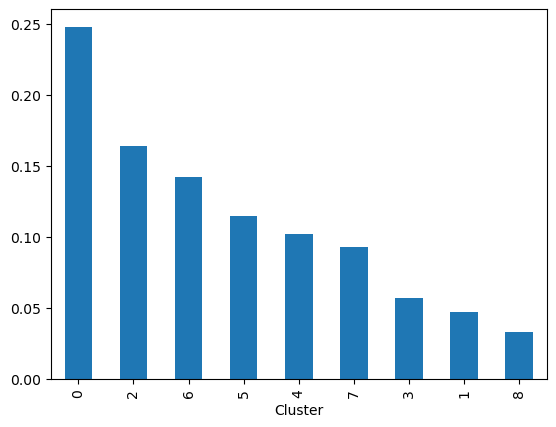

In [77]:
data_course['Cluster'].value_counts(normalize=True).plot(kind='bar');

In [78]:
data_course['text'] = data_course['Title'] + '' + data_course['Review']

In [79]:
data_course['text_clean'] = data_course['text'].apply(cleaner)

In [80]:
data_course.head()

,Title,Review,Course,Course_clean,Cluster,text,text_clean
2771,Great way to enter into the world of Data Anal...,I had a great experience with the Business Int...,Applied Business Intelligence Certificate,applied business intelligence certificate,5,Great way to enter into the world of Data Anal...,great way to enter into the world of data anal...
2772,A boost for your smooth career switch,I became familiar with WCD in early January 20...,Data Science Bootcamp,data science bootcamp,2,A boost for your smooth career switchI became ...,a boost for your smooth career switchi became ...
2773,Great Experience,I had a great experience. I liked the instruct...,Data Science Bootcamp,data science bootcamp,2,Great ExperienceI had a great experience. I li...,great experiencei had a great experience i lik...
2774,Great Experience,I had the pleasure to share this experience wi...,Applied Business Intelligence Certificate,applied business intelligence certificate,5,Great ExperienceI had the pleasure to share th...,great experiencei had the pleasure to share th...
2775,Great data analytics program,Definitely one of the best data analyst progra...,Applied Business Intelligence Certificate,applied business intelligence certificate,5,Great data analytics programDefinitely one of ...,great data analytics programdefinitely one of ...


In [81]:
# define features
X = data_course['text_clean']

In [82]:
X.shape

(5430,)

In [83]:
# define label
y = data_course['Cluster']

In [84]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [85]:
X_train.shape

(3638,)

In [86]:
X_test.shape

(1792,)

In [87]:
y_train.shape

(3638,)

In [88]:
y_test.shape

(1792,)

### Baseline Model

###### DT

In [89]:
X_train

8855    my time at le wagon barcelona i recently finis...
9249    technical boost having been working in a frenc...
5066    transition to ux with no experience what drive...
6520    best as a something i started off my general a...
7618    practical learning done well i joined le wagon...
                              ...                        
7554    intensive and exhaustive dev training after ye...
9144    hard work and lot of fun le wagon barcelona ga...
9179    you will never regret it le wagon is the great...
9351    le wagon bordeaux batch hello i was a student ...
3737    great bootcamp first off my background i have ...
Name: text_clean, Length: 3638, dtype: object

In [90]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,5), max_features = 1000)
# fit_transform for X_train
X_train_vec = vectorizer.fit_transform(X_train).toarray()
# transforn for X_test
X_test_vec = vectorizer.transform(X_test)

In [91]:
X_train.shape

(3638,)

In [92]:
X_train_vec.shape

(3638, 1000)

In [93]:
model = DecisionTreeClassifier()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

In [94]:
f1_score(y_test, y_pred, average='weighted')

0.6633346821094913

In [95]:
# count vectorizer for 1, 2, 3, 4, 5-grams
steps = [('vec', CountVectorizer(stop_words='english', ngram_range=(1,5), max_features = 1000)), 
         ('tfidf', TfidfTransformer()),
         ('dt', DecisionTreeClassifier(random_state=42))]

pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Calculate the F1 score
f1_score(y_test, y_pred, average='weighted')

0.6660188571601243

###### KNN

In [96]:
# count vectorizer for 1, 2, 3, 4, 5-grams
steps = [('vec', CountVectorizer(stop_words='english', ngram_range=(1,5), max_features = 1000)), 
         ('tfidf', TfidfTransformer()),
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

f1_score(y_test, y_pred, average='weighted')

0.7129138256267454

###### MultinomialNB

In [97]:
from sklearn.naive_bayes import MultinomialNB

steps = [('vec', CountVectorizer(stop_words='english', ngram_range=(1,5), max_features = 1000)), 
         ('tfidf', TfidfTransformer()),
         ('clf', MultinomialNB())]

pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

f1_score(y_test, y_pred, average='weighted')

0.6997863234612659

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.95      0.80       447
           1       0.88      0.38      0.54        78
           2       0.81      0.83      0.82       317
           3       0.93      0.62      0.75       101
           4       0.76      0.70      0.73       187
           5       0.55      0.63      0.59       198
           6       0.63      0.27      0.38       256
           7       0.72      0.96      0.83       155
           8       0.85      0.64      0.73        53

    accuracy                           0.72      1792
   macro avg       0.76      0.67      0.68      1792
weighted avg       0.73      0.72      0.70      1792



###### LR

In [99]:
# count vectorizer for 1, 2, 3, 4, 5-grams
steps = [('vec', CountVectorizer(stop_words='english', ngram_range=(1,5), max_features = 1000)), 
         ('tfidf', TfidfTransformer()),
         ('lr', LogisticRegression(random_state=42))]

pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

f1_score(y_test, y_pred, average='weighted')
#cross_val_score(pipeline, X, y, cv=3, scoring='f1')

0.7574301735159175

In [100]:
pipeline.steps[-1][1].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

###### SVC

In [101]:
# count vectorizer for 1, 2, 3, 4, 5-grams
steps = [('vec', CountVectorizer(stop_words='english', ngram_range=(1,5), max_features = 1000)),
         ('tfidf', TfidfTransformer()),
         ('svc', SVC(random_state=42))]

pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

f1_score(y_test, y_pred, average='weighted')

0.765880325904379

In [102]:
pipeline.steps[-1][1].get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

###### Random Forest

In [103]:
# count vectorizer for 1, 2, 3, 4, 5-grams
steps = [('vec', CountVectorizer(stop_words='english', ngram_range=(1,5), max_features = 1000)), 
         ('tfidf', TfidfTransformer()),
         ('rf', RandomForestClassifier(random_state=42))]

pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

f1_score(y_test, y_pred, average='weighted')

0.758785375837497

In [104]:
pipeline.steps[-1][1].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

###### XGBoost

In [105]:
# count vectorizer for 1, 2, 3, 4, 5-grams
steps = [('vec', CountVectorizer(stop_words='english', ngram_range=(1,5), max_features = 1000)), 
         ('tfidf', TfidfTransformer()),
         ('xgb', XGBClassifier())]

pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

f1_score(y_test, y_pred, average='weighted')

0.7573845440751842

In [106]:
pipeline.steps[-1][1].get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

#### How to run multipule model in one frame?

In [107]:
def vectorizing(algo):   
    steps = [('vec', CountVectorizer(stop_words='english', ngram_range=(1,5), max_features = 1000)),
             ('tfidf', TfidfTransformer()), 
             ('model', algo)]

    pipeline = Pipeline(steps=steps)

    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    return classification_report(y_pred, y_test)

In [108]:
list_of_algos = [LogisticRegression(), SVC(), RandomForestClassifier(), XGBClassifier()]

for x in list_of_algos:
    print(vectorizing(x))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       514
           1       0.62      0.76      0.68        63
           2       0.80      0.86      0.83       297
           3       0.72      0.84      0.78        87
           4       0.73      0.75      0.74       181
           5       0.77      0.58      0.66       263
           6       0.49      0.71      0.58       177
           7       0.86      0.80      0.83       168
           8       0.70      0.88      0.78        42

    accuracy                           0.76      1792
   macro avg       0.73      0.77      0.75      1792
weighted avg       0.78      0.76      0.76      1792

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       521
           1       0.64      0.78      0.70        64
           2       0.79      0.88      0.84       284
           3       0.73      0.91      0.81        81
           4       0.77 

#### Hyperparemeter Tuning

In [109]:
# shift+tab to check the default parameter setting
# LogisticRegression()

In [110]:
# Define pipeline for SVC
svc_steps = [('vec', CountVectorizer(stop_words='english', ngram_range=(1, 5), max_features=1000)), 
             ('tfidf', TfidfTransformer()),
             ('svc', SVC(random_state=42))]

svc_pipeline = Pipeline(steps=svc_steps)

# Define the hyperparameters and their possible values to be searched for SVC
svc_hyperparameters = {
    'svc__C': [0.1, 1.0, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto'],
}

f1_weighted_score = make_scorer(f1_score, average='weighted')

# Create the GridSearchCV object for SVC with multiple scoring metrics
svc_grid_search = GridSearchCV(svc_pipeline, svc_hyperparameters, cv=3, 
                               scoring=f1_weighted_score, 
                               n_jobs=2, verbose=2)

# Fit the GridSearchCV object on the training data to search for the best hyperparameters
svc_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy score
print("Best hyperparameters: ", svc_grid_search.best_params_)
print("Best model: ", svc_grid_search.best_estimator_)
print("Best accuracy score: ", svc_grid_search.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best hyperparameters:  {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best model:  Pipeline(steps=[('vec',
                 CountVectorizer(max_features=1000, ngram_range=(1, 5),
                                 stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('svc', SVC(C=10, random_state=42))])
Best accuracy score:  0.7517361209493011


In [111]:
# Define pipeline
steps = [('vec', CountVectorizer(stop_words='english', ngram_range=(1,5), max_features = 1000)), 
         ('tfidf', TfidfTransformer()),
         ('lr', LogisticRegression(random_state=42))]

pipeline = Pipeline(steps=steps)

# Define the hyperparameters and their possible values to be searched
hyperparameters = {
    'lr__penalty': ['l2'],
    'lr__C': [0.1, 1.0, 10],
    'lr__solver': ['lbfgs','newton-cg','saga']
}

f1_weighted_score = make_scorer(f1_score, average='weighted')

# Create the GridSearchCV object with multiple scoring metrics
grid_search = GridSearchCV(pipeline, hyperparameters, cv=3, 
                           scoring=f1_weighted_score, 
                           n_jobs=2, verbose=2)

# Fit the GridSearchCV object on the training data to search for best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and F1 score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best model: ", grid_search.best_estimator_)
print("Best accuracy score: ", grid_search.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best hyperparameters:  {'lr__C': 1.0, 'lr__penalty': 'l2', 'lr__solver': 'saga'}
Best model:  Pipeline(steps=[('vec',
                 CountVectorizer(max_features=1000, ngram_range=(1, 5),
                                 stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('lr', LogisticRegression(random_state=42, solver='saga'))])
Best accuracy score:  0.742383795548973


In [112]:
# Define pipeline
steps = [('vec', CountVectorizer(stop_words='english', ngram_range=(1,5), max_features = 1000)), 
         ('tfidf', TfidfTransformer()),
         ('xgb', XGBClassifier(random_state=42))]

pipeline = Pipeline(steps=steps)

# Define the hyperparameters and their possible values to be searched
hyperparameters = {
    'xgb__max_depth': [1, 5, 10],
    'xgb__learning_rate': [0.1, 1],
    'xgb__n_estimators': [200, 300, 400],
}

f1_weighted_score = make_scorer(f1_score, average='weighted')

# Create the GridSearchCV object with multiple scoring metrics
grid_search = GridSearchCV(pipeline, hyperparameters, cv=3, 
                           scoring=f1_weighted_score, 
                           n_jobs=2, verbose=2)

# Fit the GridSearchCV object on the training data to search for best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best model: ", grid_search.best_estimator_)
print("Best accuracy score: ", grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best hyperparameters:  {'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 300}
Best model:  Pipeline(steps=[('vec',
                 CountVectorizer(max_features=1000, ngram_range=(1, 5),
                                 stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gam...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_ca

### Stacking

In [113]:
# stacking
estimators = [
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier()),
    ('lr', LogisticRegression()),
    ('svc', SVC())
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [114]:
steps = [('vec', CountVectorizer(stop_words='english', ngram_range=(1,5), max_features = 1000)), 
         ('tfidf', TfidfTransformer()),
         ('xgb', XGBClassifier())]

stacking_pipeline = Pipeline(steps=steps)

In [115]:
stacking_pipeline.fit(X_train, y_train)

y_pred = stacking_pipeline.predict(X_test)

f1_score(y_test, y_pred, average='weighted')

0.7573845440751842

## Course prediction DL modeling

In [116]:
df = pd.read_csv('data_course.csv')
df.head()

,Title,Review,Course
0,Full Time DS Bootcamp Review,Overall a great program especially for career ...,NaN
1,A good bootcamp! its worth to make the decision,I attended the data and business analytics boo...,NaN
2,Best DS BootCamp in Canada,I arrived in Canada with a Bachelor's degree i...,NaN
3,Best DS in Canada,I arrived in Canada with a Bachelor's degree i...,NaN
4,Great program with helpful career guidance,I attended WeCloudData Applied BI program in 2...,NaN


In [117]:
df['Course'].unique().tolist()

[nan,
 'Applied Business Intelligence Certificate',
 'Data Science Bootcamp',
 'Data Engineering Bootcamp',
 'Data Science Diploma',
 'Data Engineering Diploma',
 'Programming for Data Engineers',
 'Data Science Immersive Bootcamp',
 'AWS Big Data Development',
 'SQL for Data Science',
 'Excel',
 'Data Science with Python',
 'Hadoop for Data Scientists',
 'Big Data at Scale',
 'Product Management Online',
 'Digital Marketing Diploma',
 'Product Management',
 'Cyber Security',
 'Online User Experience Design Diploma',
 'Online Data Science Diploma',
 'Web Development Diploma',
 'Online Social Media Marketing',
 'Design Thinking',
 'Data Science Course',
 'User Interface Design',
 'Digital Marketing Online',
 'Data Science Online',
 'Digital Marketing',
 'Web Development',
 'User Experience Design',
 'Online Product Management',
 'Online Web Development',
 'User Experience Design Online',
 'Data Analytics',
 'Social Media Marketing',
 'Social Media Marketing Online',
 'Online Machine Lea

In [118]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a function to clean and standardize the course names
def clean_course_name(course_name):
    # Replace any non-alphanumeric characters with spaces
    course_name = ''.join(c if c.isalnum() else ' ' for c in course_name)
    # Convert to lowercase
    course_name = course_name.lower()
    # Remove leading/trailing whitespace
    course_name = course_name.strip()
    # Replace multiple spaces with a single space
    course_name = ' '.join(course_name.split())
    return course_name

# Load your DataFrame with course names
df = pd.read_csv('data_course.csv').dropna()

# Apply the cleaning function to the 'Course' column of the DataFrame
df['Course_clean'] = df['Course'].apply(clean_course_name)

# Use a vectorizer to convert the cleaned course names into feature vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Course_clean'])

# Use KMeans clustering to group the course names into clusters
kmeans = KMeans(n_clusters=10, n_init = 10, random_state=42)
kmeans.fit(X)

# Assign the cluster labels back to the DataFrame
df['Cluster'] = kmeans.labels_

# Print the clusters and their courses
for cluster_id in range(kmeans.n_clusters):
    print(f"Cluster {cluster_id}:")
    print(df.loc[df['Cluster'] == cluster_id, 'Course'])
    print()

Cluster 0:
2869           Data Analytics
2874    Data Analytics Online
2881    Data Analytics Online
2884    Data Analytics Online
2893    Data Analytics Online
                ...          
6944           Data Analytics
6957           Data Analytics
6973           Data Analytics
6990           Data Analytics
7018           Data Analytics
Name: Course, Length: 285, dtype: object

Cluster 1:
7904                    FullStack program
7905                    FullStack program
7906                    FullStack program
7907                    FullStack program
7908                    FullStack program
                      ...                
9386    FullStack program - 35+ locations
9387    FullStack program - 35+ locations
9390    FullStack program - 35+ locations
9406    FullStack program - 35+ locations
9411    FullStack program - 35+ locations
Name: Course, Length: 1345, dtype: object

Cluster 2:
2843    Online User Experience Design Diploma
2853                    User Interface Desig

In [119]:
df['text'] = df['Title'] + '' + df['Review']

In [120]:
df['text_clean'] = df['text'].apply(cleaner)

In [121]:
df.head()

,Title,Review,Course,Course_clean,Cluster,text,text_clean
2771,Great way to enter into the world of Data Anal...,I had a great experience with the Business Int...,Applied Business Intelligence Certificate,applied business intelligence certificate,5,Great way to enter into the world of Data Anal...,great way to enter into the world of data anal...
2772,A boost for your smooth career switch,I became familiar with WCD in early January 20...,Data Science Bootcamp,data science bootcamp,4,A boost for your smooth career switchI became ...,a boost for your smooth career switchi became ...
2773,Great Experience,I had a great experience. I liked the instruct...,Data Science Bootcamp,data science bootcamp,4,Great ExperienceI had a great experience. I li...,great experiencei had a great experience i lik...
2774,Great Experience,I had the pleasure to share this experience wi...,Applied Business Intelligence Certificate,applied business intelligence certificate,5,Great ExperienceI had the pleasure to share th...,great experiencei had the pleasure to share th...
2775,Great data analytics program,Definitely one of the best data analyst progra...,Applied Business Intelligence Certificate,applied business intelligence certificate,5,Great data analytics programDefinitely one of ...,great data analytics programdefinitely one of ...


In [122]:
X = df['text_clean']
y = df['Cluster']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare text data for training
max_words = 5000  # maximum number of words to keep
max_len = 100  # maximum length of input sequences

# Tokenize the text data
tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
val_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the tokenized sequences to have the same length
X_train = pad_sequences(train_sequences, maxlen=max_len)
X_test = pad_sequences(val_sequences, maxlen=max_len)

# Define the deep learning model
model = Sequential()
model.add(Embedding(max_words, 32))
model.add(LSTM(64))
# model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='softmax')) 

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Evaluate the model
model.evaluate(X_test, y_test)

Epoch 1/10
57/57 [==============================] - 7s 85ms/step - loss: 2.1458 - accuracy: 0.2455 - val_loss: 2.0584 - val_accuracy: 0.2494
Epoch 2/10
57/57 [==============================] - 4s 78ms/step - loss: 1.9010 - accuracy: 0.3098 - val_loss: 1.6794 - val_accuracy: 0.4018
Epoch 3/10
57/57 [==============================] - 5s 89ms/step - loss: 1.6145 - accuracy: 0.3964 - val_loss: 1.5791 - val_accuracy: 0.4235
Epoch 4/10
57/57 [==============================] - 6s 102ms/step - loss: 1.5035 - accuracy: 0.4294 - val_loss: 1.5326 - val_accuracy: 0.4453
Epoch 5/10
57/57 [==============================] - 6s 101ms/step - loss: 1.3939 - accuracy: 0.4821 - val_loss: 1.4765 - val_accuracy: 0.4816
Epoch 6/10
57/57 [==============================] - 6s 112ms/step - loss: 1.2212 - accuracy: 0.5602 - val_loss: 1.3520 - val_accuracy: 0.5223
Epoch 7/10
57/57 [==============================] - 5s 85ms/step - loss: 1.1265 - accuracy: 0.5720 - val_loss: 1.3468 - val_accuracy: 0.5329
Epoch 8/10

[1.3636302947998047, 0.5011160969734192]

## Final Model and Prediction

In [125]:
data_course = pd.read_csv('data_course.csv').dropna()

In [126]:
# Define a function to clean and standardize the course names
def clean_course_name(course_name):
    # Replace any non-alphanumeric characters with spaces
    course_name = ''.join(c if c.isalnum() else ' ' for c in course_name)
    # Convert to lowercase
    course_name = course_name.lower()
    # Remove leading/trailing whitespace
    course_name = course_name.strip()
    # Replace multiple spaces with a single space
    course_name = ' '.join(course_name.split())
    return course_name

# Load your DataFrame with course names
data_course = pd.read_csv('data_course.csv').dropna()

# Apply the cleaning function to the 'Course' column of the DataFrame
data_course['Course_clean'] = data_course['Course'].apply(clean_course_name)

# Use a vectorizer to convert the cleaned course names into feature vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_course['Course_clean'])

# Use KMeans clustering to group the course names into clusters
kmeans = KMeans(n_clusters=9, n_init = 10, random_state=42)
kmeans.fit(X)

# Assign the cluster labels back to the DataFrame
data_course['Cluster'] = kmeans.labels_

# Print the clusters and their courses
for cluster_id in range(kmeans.n_clusters):
    print(f"Cluster {cluster_id}:")
    print(data_course.loc[data_course['Cluster'] == cluster_id, 'Course'])
    print()

Cluster 0:
7904                    FullStack program
7905                    FullStack program
7906                    FullStack program
7907                    FullStack program
7908                    FullStack program
                      ...                
9386    FullStack program - 35+ locations
9387    FullStack program - 35+ locations
9390    FullStack program - 35+ locations
9406    FullStack program - 35+ locations
9411    FullStack program - 35+ locations
Name: Course, Length: 1345, dtype: object

Cluster 1:
4930    Software Engineering Career Track Prep
4942         Software Engineering Career Track
4946         Software Engineering Career Track
4950         Software Engineering Career Track
4953         Software Engineering Career Track
                         ...                  
7167            Software Engineering Immersive
7169            Software Engineering Immersive
7173            Software Engineering Immersive
7174            Software Engineering Immersive
717

In [127]:
data_course.loc[data_course['Cluster'] == 0, 'Course'].unique()

array(['FullStack program', 'FullStack program - 35+ locations'],
      dtype=object)

In [128]:
data_course['text'] = data_course['Title'] + '' + data_course['Review']

In [129]:
data_course['text_clean'] = data_course['text'].apply(cleaner)

In [130]:
data_course.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5430 entries, 2771 to 9411
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         5430 non-null   object
 1   Review        5430 non-null   object
 2   Course        5430 non-null   object
 3   Course_clean  5430 non-null   object
 4   Cluster       5430 non-null   int32 
 5   text          5430 non-null   object
 6   text_clean    5430 non-null   object
dtypes: int32(1), object(6)
memory usage: 318.2+ KB


In [131]:
# define features
X = data_course['text_clean']

In [132]:
# define label
y = data_course['Cluster']

In [133]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [134]:
# Define pipeline
steps = [('vec', CountVectorizer(stop_words='english', ngram_range=(1,8), max_features = 10000)), 
         ('tfidf', TfidfTransformer()),
         ('xgb', XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=300, random_state=42))]

pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

f1_score(y_test, y_pred, average='weighted')

0.7801509625369629

In [135]:
# Define pipeline
steps = [('vec', CountVectorizer(stop_words='english', ngram_range=(1,8), max_features = 10000)), 
         ('tfidf', TfidfTransformer()),
         ('svc',SVC(C=10, gamma='scale', kernel='rbf'))]

pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

f1_score(y_test, y_pred, average='weighted')

0.7848774517602913

In [136]:
df = pd.read_csv('data_ml.csv')

In [137]:
null_course = df[df['Course'].isnull()]

In [138]:
null_course['text'] = null_course['Title'] + ' ' + null_course['Review']

C:\Users\Hanme\AppData\Local\Temp\ipykernel_20572\1693507433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_course['text'] = null_course['Title'] + ' ' + null_course['Review']


In [139]:
course_pred = pipeline.predict(null_course['text'])

In [140]:
course_pred

array([2, 4, 2, ..., 0, 0, 6])

In [141]:
null_course['Course']=course_pred

C:\Users\Hanme\AppData\Local\Temp\ipykernel_20572\1375923025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_course['Course']=course_pred


In [142]:
course = df[df['Course'].notnull()]

In [143]:
# Apply the cleaning function to the 'Course' column of the DataFrame
course['Course_clean'] = course['Course'].apply(clean_course_name)

# Use a vectorizer to convert the cleaned course names into feature vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(course['Course_clean'])

# Use KMeans clustering to group the course names into clusters
kmeans = KMeans(n_clusters=9, n_init = 10, random_state=42)
kmeans.fit(X)

# Assign the cluster labels back to the DataFrame
course['Cluster'] = kmeans.labels_

C:\Users\Hanme\AppData\Local\Temp\ipykernel_20572\1166379649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course['Course_clean'] = course['Course'].apply(clean_course_name)
C:\Users\Hanme\AppData\Local\Temp\ipykernel_20572\1166379649.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course['Cluster'] = kmeans.labels_


In [144]:
course['Course'] = course['Cluster']

C:\Users\Hanme\AppData\Local\Temp\ipykernel_20572\2672659475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course['Course'] = course['Cluster']


In [145]:
course = course.iloc[:, :-5]

In [146]:
null_course = null_course.iloc[:, :-4]

In [147]:
# full data with predicted course
pred_data = pd.concat([course, null_course]).sort_index()

In [148]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9446 entries, 0 to 9445
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   school          9446 non-null   object 
 1   overview        2771 non-null   float64
 2   Course          9446 non-null   int32  
 3   Title           9446 non-null   object 
 4   Review          9446 non-null   object 
 5   Overall_rating  9446 non-null   float64
 6   Instructors     9446 non-null   float64
 7   Curriculum      9446 non-null   float64
 8   Job Assistance  9446 non-null   float64
 9   pros            2771 non-null   object 
dtypes: float64(5), int32(1), object(4)
memory usage: 774.9+ KB


In [149]:
course_dict = {
    0: 'Full Stack',
    1: 'Software Engineering',
    2: 'Data Science',
    3: 'User Experience Design',
    4: 'Data Analytics',
    5: 'Business Intelligence & Product Management',
    6: 'Web Development',
    7: 'UX Design',
    8: 'Digital Marketing'
}

pred_data['Course'] = pred_data['Course'].map(course_dict)

In [150]:
pred_data.head()

,school,overview,Course,Title,Review,Overall_rating,Instructors,Curriculum,Job Assistance,pros
0,WeCloudData,4.8,Data Science,Full Time DS Bootcamp Review,Overall a great program especially for career ...,100.0,80.0,100.0,60.0,- Knowledgeable and patient instructors and TA...
1,WeCloudData,4.8,Data Analytics,A good bootcamp! its worth to make the decision,I attended the data and business analytics boo...,100.0,100.0,100.0,100.0,"Great support, nice tutor, practical content"
2,WeCloudData,4.8,Data Science,Best DS BootCamp in Canada,I arrived in Canada with a Bachelor's degree i...,100.0,100.0,100.0,100.0,Really straight forward wth projects that help...
3,WeCloudData,4.8,Data Science,Best DS in Canada,I arrived in Canada with a Bachelor's degree i...,100.0,100.0,100.0,100.0,"Really straight forward, with projects that he..."
4,WeCloudData,4.8,Business Intelligence & Product Management,Great program with helpful career guidance,I attended WeCloudData Applied BI program in 2...,100.0,100.0,80.0,100.0,Instructors/mentors/TAs are nice. My mentor Le...


In [151]:
pred_data.to_csv('pred_data.csv', index=False)